<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/OSMX_13_City_street_network_orientations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

import geopandas as gpd

%matplotlib inline
ox.__version__

%matplotlib inline
weight_by_length = False

ox.__version__

'1.1.2'

In [7]:
# turn response caching off
ox.config(use_cache=False)

# turn it back on and turn on/off logging to your console
ox.config(use_cache=True, log_console=False)

In [12]:
# define the study sites as label : query
places = {
    # 'Atlanta'       : 'Atlanta, Georgia, USA',
    # 'Boston'        : 'Boston, MA, USA',
    "Buffalo": "Buffalo, NY, USA",
    # 'Charlotte'     : 'Charlotte, NC, USA',
    # 'Chicago'       : 'Chicago, IL, USA',
    "Cleveland": "Cleveland, OH, USA",
    # 'Dallas'        : 'Dallas, TX, USA',
    # 'Houston'       : 'Houston, TX, USA',
    # 'Denver'        : 'Denver, CO, USA',
    # 'Detroit'       : 'Detroit, MI, USA',
    # 'Las Vegas'     : 'Las Vegas, NV, USA',
    # 'Los Angeles'   : {'city':'Los Angeles', 'state':'CA', 'country':'USA'},
    # 'Manhattan'     : 'Manhattan, NYC, NY, USA',
    "Miami": "Miami, FL, USA",
    "Minneapolis": "Minneapolis, MN, USA",
    # 'Orlando'       : 'Orlando, FL, USA',
    # 'Philadelphia'  : 'Philadelphia, PA, USA',
    # 'Phoenix'       : 'Phoenix, AZ, USA',
    # 'Portland'      : 'Portland, OR, USA',
    # 'Sacramento'    : 'Sacramento, CA, USA',
    #"San Francisco": {"city": "San Francisco", "state": "CA", "country": "USA"},
    # 'Seattle'       : 'Seattle, WA, USA',
    # 'St Louis'      : 'St. Louis, MO, USA',
    # 'Tampa'         : 'Tampa, FL, USA',
    "Washington": "District of Columbia, USA",
}

In [14]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-78.91945 42.94717, -78.91913 42.946...",42.966469,42.826039,-78.795168,-78.919453,282417634,relation,175031,42.886717,-78.878392,"Buffalo, Erie County, New York, United States",boundary,administrative,0.732931
1,"POLYGON ((-81.87909 41.39641, -81.87906 41.395...",41.604436,41.390628,-81.532744,-81.879094,282839750,relation,182130,41.498438,-81.668354,"Cleveland, Cuyahoga County, Ohio, United States",boundary,administrative,0.856081
2,"POLYGON ((-80.31976 25.76249, -80.31968 25.762...",25.855783,25.709052,-80.139157,-80.319760,282510924,relation,1216769,25.774173,-80.193620,"Miami, Miami-Dade County, Florida, United States",boundary,administrative,0.885449
3,"POLYGON ((-93.32913 44.92030, -93.32911 44.920...",45.051250,44.890150,-93.193859,-93.329127,282280126,relation,136712,44.972244,-93.268225,"Minneapolis, Hennepin County, Minnesota, Unite...",boundary,administrative,0.747169
4,"POLYGON ((-77.11979 38.93435, -77.11977 38.934...",38.995968,38.791630,-76.909366,-77.119795,282296580,relation,162069,38.893847,-76.988043,"District of Columbia, United States",boundary,administrative,0.712066


2022-01-20 13:16:23 Buffalo
2022-01-20 13:16:44 Cleveland
2022-01-20 13:17:28 Miami
2022-01-20 13:18:18 Minneapolis
2022-01-20 13:18:54 Washington


FileNotFoundError: ignored

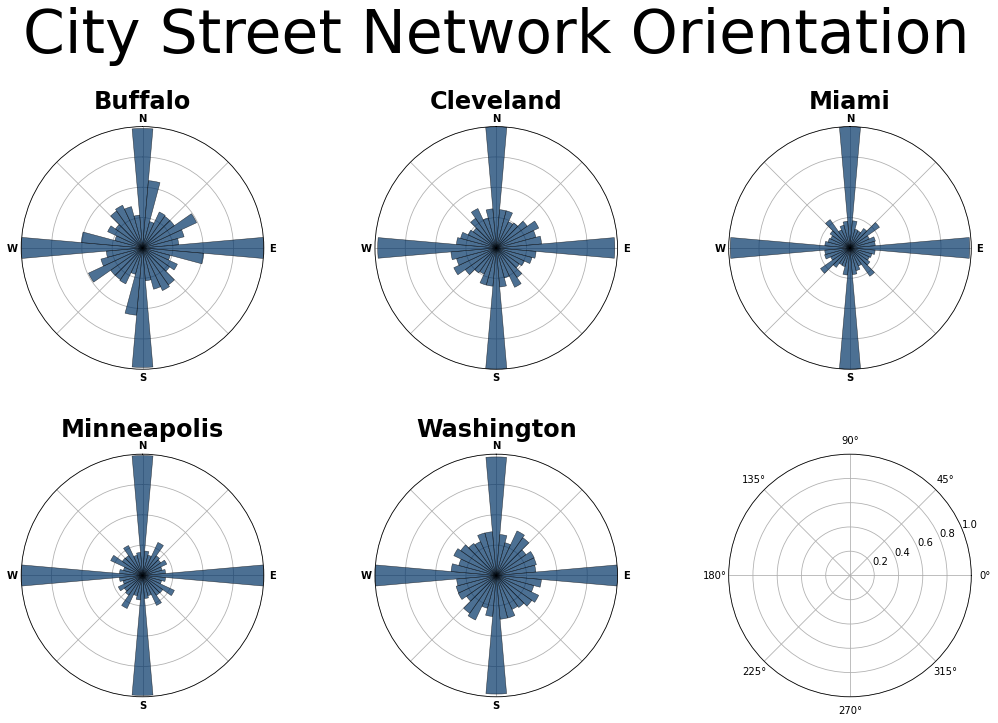

In [15]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    fig, ax = ox.bearing.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
plt.close()